In [38]:
from collections import namedtuple
from igraph import Graph, plot, layout
%config InlineBackend.figure_format = 'png'

In [383]:
class Node(object):
    def __init__(self, key, payload=None):
        # key of the three
        self.key     = key
        self.payload = payload
        self.left    = None
        self.right   = None
        self.parent  = None
        
    def is_left_child(self):
        return self.parent is not None and self.parent.left is self
    
    def is_right_child(self):
        return self.parent is not None and self.parent.right is self

    def __repr__(self):
        return '<Node key=%d left=%s right=%s>' % (self.key, self.left, self.right)
        
def BST_find(where, key):
    if where is None:
        return None
    elif where.key == key:
        return where
    elif key < where.key:
        return BST_find(where.left, key)
    elif key > where.key:
        return BST_find(where.right, key)
        
def BST_insert(where, key, payload=None):
    if where is None:
        return Node(key, payload)
    elif key <= where.key:
        where.left = BST_insert(where.left, key, payload)
        where.left.parent = where
    elif key > where.key:
        where.right = BST_insert(where.right, key, payload)
        where.right.parent = where
    return where

def BST_minimum(root):
    current_node = root
    while current_node.left is not None:
        current_node = current_node.left
    return current_node

def BST_draw(node, g):
    if node is None:
        return
    
    if node.left is not None:
        BST_draw(node.left,  g)
        left_id = str(id(node.left))
        left_color = "black"
    else:
        g.add_vertex(shape=0,)
        left_id = len(g.vs) - 1
        left_color = "#00000000"
    
    if node.right is not None:
        BST_draw(node.right, g)
        right_id = str(id(node.right))
        right_color = "black"
    else:
        g.add_vertex(shape=0,)
        right_id = len(g.vs) - 1
        right_color = "#00000000"

    g.add_vertex(name=str(id(node)), label=str(node.key), shape="rectangle", color="lightblue")
    if node.left is not None or node.right is not None:
        g.add_edge(str(id(node)), left_id, color=left_color)
        g.add_edge(str(id(node)), right_id, color=right_color)
        
def BST_succesor(node):
    if node is None:
        return None
    elif node.right is not None:
        return BST_minimum(node.right)
    else:
        current_node = node
        while True:
            if current_node.parent is None:
                return None
            if current_node.is_right_child():
                current_node = current_node.parent
            elif current_node.is_left_child():
                return current_node.parent
            
class BST(object):
    def __init__(self):
        self.root = None
    
    def insert(self, key, payload=None):        
        self.root = BST_insert(self.root, key, payload)
    
    def find(self, key):
        return BST_find(self.root, key)
    
    def minimum(self):
        return BST_minimum(self.root)
    
    def succesor(self, node):
        return BST_succesor(node)
    
    def delete(self, delete_me):
        replacement = None
        if delete_me.right is not None:
            replacement = delete_me.right
            if delete_me.left is not None:
                min_right = BST_minimum(replacement)
                min_right.left = delete_me.left
                delete_me.left.parent = min_right
        elif delete_me.left is not None:
            replacement = delete_me.left
        
        if delete_me.parent is None:
            assert delete_me is root
            root = replacement
            if replacement is not None:
                replacement.parent = None
        else:
            if replacement is not None:
                replacement.parent = delete_me.parent
            if delete_me.is_left_child():
                delete_me.parent.left = replacement
            elif delete_me.is_right_child():
                delete_me.parent.right = replacement
    
    def draw(self):
        g = Graph()
        if self.root is not None:
            BST_draw(self.root, g)
            root_id = [i for i, node in enumerate(g.vs) if g.vs[i]['name'] == str(id(self.root))]
            assert len(root_id) == 1
            return plot(g, layout = Graph.layout_reingold_tilford(g, mode="in", root=root_id), 
                        bbox=(300,300), vertex_size=30)

In [384]:
x = BST()

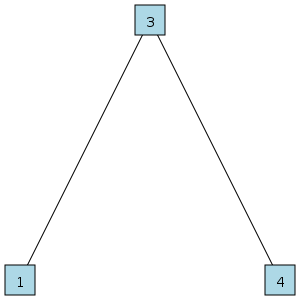

In [385]:
x.insert(3)
x.insert(4)
x.insert(1)
x.draw()

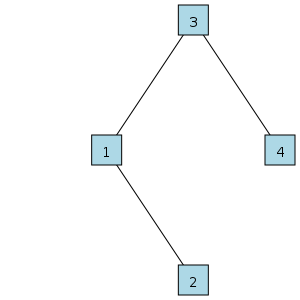

In [387]:
x.insert(2)
x.draw()
x.draw()

In [388]:
x.succesor(x.find(2))

<Node key=3 left=<Node key=1 left=None right=<Node key=2 left=None right=None>> right=<Node key=4 left=None right=None>>

In [380]:
x.succesor(x.find(1))

<Node key=2 left=None right=None>

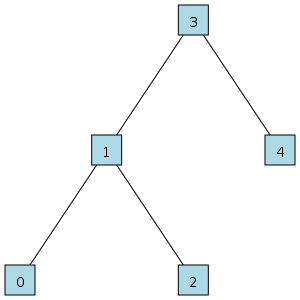

In [358]:
x.insert(0)
x.draw()
x.draw()

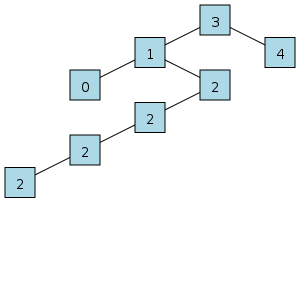

In [359]:
x.insert(2)
x.insert(2)
x.insert(2)
x.draw()
x.draw()

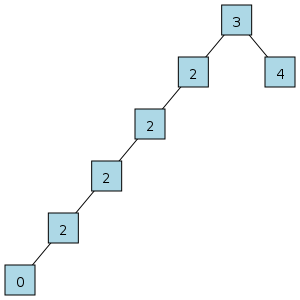

In [361]:
x.delete(x.find(1))
x.draw()
x.draw()

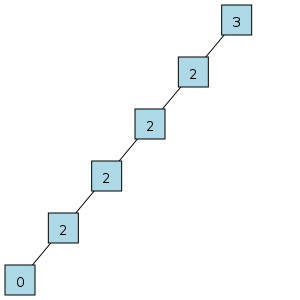

In [362]:
x.delete(x.find(4))
x.draw()

In [382]:
def BST_check_parents(node):
    if node.left is not None:
        assert node.left.parent is node
        BST_check_parents(node.left)
    if node.right is not None:
        assert node.right.parent is node
        BST_check_parents(node.right)
BST_check_parents(x.root)